## Monte Carlo Integration

Suppose we want to evaluate an integral $I = \int_{a}^{b} f(x) dx$ we can approximate the integral as follows

$I = \int_{a}^{b} f(x) dx = \int_{a}^{b} w(x) p(x) dx = E_p [w(x)] = \frac{1}{n} \sum_{i=1}^{N} w(x_i)$, where $x_i \sim \mathrm{Unif}(a,b)$

We defined $w(x) = f(x)(b-a)$ and $p(x) = 1/(b-a)$ is the pdf of a uniform random variable over $(a,b)$. As we increase the number of samples $N$, our empirical estimate of the mean becomes more accurate. In fact, the standard error is equal to $\sigma/\sqrt{n}$, where $\sigma$ is the empirical standard deviation:

$\sigma^{2} = \frac{1}{N-1} \sum_{i=1}^{N} (f(x_i) - I)^{2}$

We can use a monte carlo integration to estimate $\pi$. We know that the area of a circle with radius $r$ is $\pi r^2$. Alternatively, the area of a circle can be computed as:

$I = \int_{-r}^{r} \int_{-r}^{r} 1[x^2 + y^2 \leq r^2] dx dy = E_{x,y}[w(x,y)]$

Therefore, $\pi = I / r^2$. To compute $I$, note that:

$w(x,y) = (b_x-a_x)(b_y-a_y)1[x^2+y^2\leq r^2] = (2r)(2r)1[x^2+y^2\leq r^2] = 4r^2 1[x^2+y^2\leq r^2]$

where $1[x^2+y^2\leq r^2]$ is an indicator function equal to 1 when a point is inside a circle of radius $r$ and equal to 0 otherwise. We can implement $\pi$ estimator as follows.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
radius = 1
num_iter = int(1e4)
    
X = np.random.uniform(-radius,+radius,num_iter)
Y = np.random.uniform(-radius,+radius,num_iter)
    
R2 = X**2 + Y**2
inside = R2 < radius**2
outside = ~inside
    
samples = (2*radius)*(2*radius)*inside
   
I_hat = np.mean(samples)
pi_hat = I_hat/radius ** 2
pi_hat_se = np.std(samples)/np.sqrt(num_iter)    
print("pi est: {} +/ {:f}".format(pi_hat, pi_hat_se))

pi est: 3.1348 +/ 0.016469


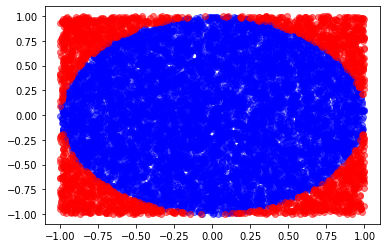

In [3]:
#visualize results
plt.figure()
plt.scatter(X[inside],Y[inside], c='b', alpha=0.5)
plt.scatter(X[outside],Y[outside], c='r', alpha=0.5)
plt.show()

We can see the accepted monte carlo samples in blue corresponding to samples inside the circle and the rejected samples in red. In the above example we assumed that samples came from a uniform distribution $X, Y \sim \mathrm{Unif}(-r,r)$. Sampling from more complicated distributions in high dimensions is carried out using Markov Chain Monte Carlo (MCMC) methods.